In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

### 导入乳腺癌数据集

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X.shape

(569, 30)

In [4]:
np.unique(y)

array([0, 1])

将前两列特征可视化

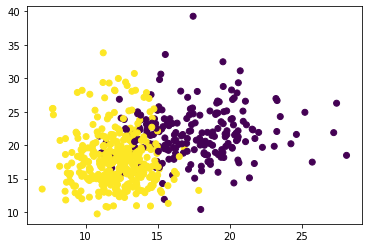

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

降维可视化

In [6]:
from sklearn.decomposition import PCA

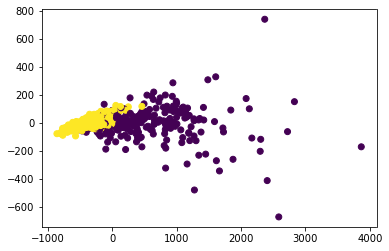

In [7]:
x_dr = PCA(n_components=2).fit_transform(X)
plt.scatter(x_dr[:,0], x_dr[:,1], c=y)
plt.show()

划分训练测试集，先初步跑一下四个不同的核

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=30, random_state=20)

In [9]:
Kernal = ['linear', 'rbf', 'sigmoid']

其中 cache_size 代表了模型可以用多大的内存

In [10]:
for ker in Kernal:
    time0 = time()
    clf = SVC(kernel=ker, gamma='auto', cache_size=3000).fit(Xtrain, Ytrain)
    
    print("The accuracy under kernal %s is %f" % (ker,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernal linear is 0.966667
00:00:746094
The accuracy under kernal rbf is 0.500000
00:00:036399
The accuracy under kernal sigmoid is 0.500000
00:00:022703


从以上结果看，毫无疑问是一个线性的数据，可以用多项式核函数，并设置degree=1

In [11]:
Kernal = ['linear', 'poly', 'rbf', 'sigmoid']

In [12]:
for ker in Kernal:
    time0 = time()
    clf = SVC(kernel=ker, gamma='auto', degree=1, cache_size=3000).fit(Xtrain, Ytrain)
    
    print("The accuracy under kernal %s is %f" % (ker,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernal linear is 0.966667
00:00:863253
The accuracy under kernal poly is 0.933333
00:00:068567
The accuracy under kernal rbf is 0.500000
00:00:021422
The accuracy under kernal sigmoid is 0.500000
00:00:010622


为什么 rbf 表现如此糟糕？查看一下数据：

In [13]:
import pandas as pd

In [14]:
data_ = pd.DataFrame(X)
data_.describe([0.01,0.05,0.1,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,50%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,13.370000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,18.840000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,86.240000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,551.100000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.095870,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.092630,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.061540,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.033500,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.179200,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.061540,0.072266,0.085438,0.09744


可以看到部分特征的均值很小，只有零点零几，部分的很大，有好几百，因此存在量纲不统一的问题

对于值较大的特征还存在偏态的问题，比如0.99时候的数据比1时候的数据大了许多

数据处理

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X_ = StandardScaler().fit_transform(X)
data_ = pd.DataFrame(X_)
data_.describe([0.01,0.05,0.1,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,50%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.215082,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.104636,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.235980,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.295187,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.034891,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.221940,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.342240,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.397721,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.071627,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.178279,1.342243,3.209454,4.910919


再次测试一下

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_, y, test_size=30, random_state=20)

In [18]:
for ker in Kernal:
    time0 = time()
    clf = SVC(kernel=ker, gamma='auto', degree=1, cache_size=3000).fit(Xtrain, Ytrain)
    
    print("The accuracy under kernal %s is %f" % (ker,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernal linear is 0.966667
00:00:011464
The accuracy under kernal poly is 0.966667
00:00:005200
The accuracy under kernal rbf is 0.966667
00:00:014455
The accuracy under kernal sigmoid is 0.966667
00:00:004832


可以看到，正确率高了不少，由于 svm 计算超平面距离，因此，**svm 的 rbf 运行前应先对数据进行无量纲化**

其他参数
- gamma 核函数的系数，默认auto(1/特征数) 
- degree 是多项式的最高次项数，输入其他核函数时此参数不起作用

0.9666666666666667 0.004291934260128779


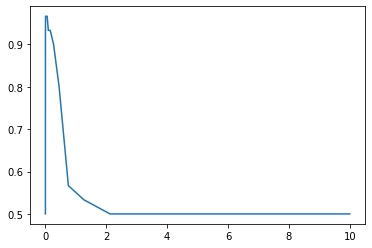

In [19]:
score = []
gamma_range = np.logspace(-10, 1, 50)
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=2000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

## 软间隔

当两组数据是完全线性可分，我们可以找出一个决策边界使得训练集上的分类误差为0，这两种数据就被称为 是存在”硬间隔“的。当两组数据几乎是完全线性可分的，但决策边界在训练集上存在较小的训练误差，这两种 数据就被称为是存在”软间隔“。

其中引入了松弛系数 C 和对应的惩罚项，同时拉格朗日函数、对偶函数、最终的损失函数等都需要更改，一系列复杂的数学运算后，得到最终损失函数

画出参数 C 对应的学习曲线

0.9666666666666667 0.01


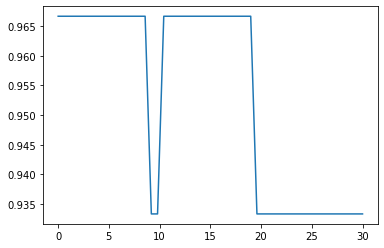

In [20]:
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9666666666666667 0.6220408163265306


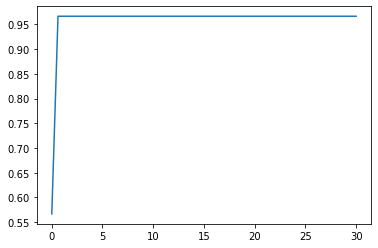

In [21]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

### 样本不均衡
class_weight

In [22]:
from sklearn.datasets import make_blobs

构建不均衡的样本，10:1

In [23]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std =[1.5,0.5]
X,y = make_blobs(n_samples=[class_1, class_2], 
                 centers=centers, 
                 cluster_std=clusters_std, 
                 random_state=20, 
                 shuffle=False)

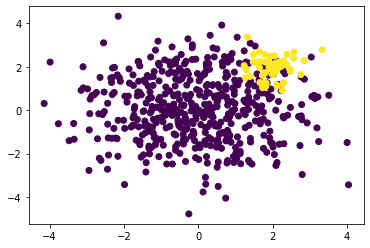

In [24]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

分别用两个模型训练，一个设置 class_weight 一个不设置

In [25]:
clf = SVC(kernel='linear', random_state=20, C=1.0)
clf.fit(X,y)

SVC(kernel='linear', random_state=20)

In [26]:
wclf = SVC(kernel='linear', random_state=20, C=1.0, class_weight={1:10})
wclf.fit(X,y)

SVC(class_weight={1: 10}, kernel='linear', random_state=20)

In [27]:
clf.score(X,y)

0.9327272727272727

In [28]:
wclf.score(X,y)

0.8945454545454545

做样本均衡反而更差了

画一下决策边界可视化看一下

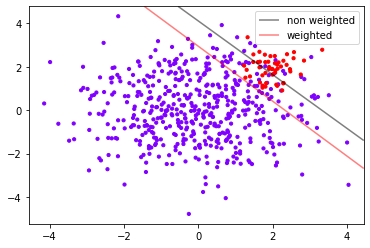

In [29]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=10)
ax = plt.gca()

# 一、构造网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

XX, YY = np.meshgrid(xx, yy)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 找出样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)

# 在子图中画等高线
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])

# 图例第一个是对象列表，这里对象是线， 第二个参数是图例列表
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"])
plt.show()


可以看到，做过样本均衡后，红色点明显正确率变高，证明少数类被更多的关注了

但是，在实际情况中，往往我们要寻找**捕获少数类的能力** 和 **将多数类判错后付出的成本**之间的平衡，为此，引入混淆矩阵和 ROC 曲线。

### 模型评估指标
- 混淆矩阵
- ROC 曲线

混淆矩阵是二分类问题的多维衡量指标体系，在样本不平衡时极其有用。在混淆矩阵中，我们将少数类认为是正例，多数类认为是负例。在决策树，随机森林这些普通的分类算法里，即是说少数类是1，多数类是0。在SVM里，就是说少数类是1，多数类是-1。

|     | 预测1| 预测0|
|  ----  | ----  | ----  |
| 真实1 | 11 | 10 |
| 真实0 | 01 | 00 |

**准确率**
$$Accuracy = \frac{11+00}{11+01+10+00}$$

**精确度(查准率)** 精确度是”将多数类判 错后所需付出成本“的衡量。
$$Precision = \frac{11}{11+01}$$

In [30]:
# 分子：所有判断对了的样本中，为红色的样本数量。分母：所有判断为 1 的样本数
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()

0.6326530612244898

In [31]:
#对于有class_weight，做了样本平衡的红色决策边界来说:
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.46296296296296297

可以看到，做了样本均衡之后，有更多的多数类被分错了

**召回率(Recall)** 又被称为敏感度(sensitivity)，真正率，查全率，表示所有真实为1的样本中，被我们预测正确的样本所占的比例。召回率越低，代表我们没有捕捉出足够的少数类。

$$Recall = \frac{11}{11+10}$$

In [32]:
# 分子：所有判断对了的样本中，为红色的样本数量。分母：所有真实为 1 的样本数
(y[y == clf.predict(X)] == 1).sum()/(y == 1).sum()

0.62

In [33]:
#对于有class_weight，做了样本平衡的红色决策边界来说:
(y[y == wclf.predict(X)] == 1).sum()/(y == 1).sum()

1.0

可以看到对于做过样本均衡的模型，召回率非常高

召回率和精确度是此消彼长的，两者之间的平衡代表了捕捉少数类的需求和尽量不要误伤多数类的需求的平衡

为了同时兼顾两者，用两者的调和平均数作为考量两者平衡的综合性指标，称之为F1 measure。两个数之间的调和平均倾向于靠近两个数中比较小的那一个数，因此我们追求尽量高的F1 measure， 能够保证我们的精确度和召回率都比较高。F1 measure在[0,1]之间分布，越接近1越好。

$$F-measure = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = \frac{2*Precision*Recall}{Precision+Recall}$$

**特异度(Specificity)** 表示所有真实为0的样本中，被正确预测为0的样本所占的比例。

$$Specificity = \frac{00}{01+00}$$

In [34]:
(y[y == clf.predict(X)] == 0).sum()/(y == 0).sum()

0.964

In [35]:
(y[y == wclf.predict(X)] == 0).sum()/(y == 0).sum()

0.884

**假正率** 表示模型将多数类判断错误的能力

$$FPR = \frac{01}{01+00}$$

我们希望看到的是，Recall 和 FPR 的变化情况，具体意义是随着召回率的增加，多数类分错的情况如何，也就是，移动决策超平面，每增加一个少数类的判断正确，有多少多数类会判断错误，这就是 ROC 曲线。

### 阈值

构造数据集

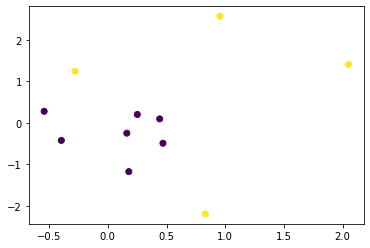

In [36]:
class_1 = 7
class_2 = 4
center_ = [[0.0,0.0], [1,1]]
clusters_std = [0.5,1]
X_, y_ = make_blobs(n_samples=[class_1, class_2], 
                    centers = center_, 
                    cluster_std = clusters_std, 
                    random_state = 20, 
                    shuffle = False)
plt.scatter(X_[:,0], X_[:,1], c=y_)
plt.show()

线性模型

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf_lo = LogisticRegression().fit(X_, y_)

下面的就是这个数据点分别位于每一类的概率

In [39]:
prob = clf_lo.predict_proba(X_)
prob

array([[0.6345038 , 0.3654962 ],
       [0.793938  , 0.206062  ],
       [0.78551507, 0.21448493],
       [0.68877565, 0.31122435],
       [0.66020389, 0.33979611],
       [0.71987229, 0.28012771],
       [0.81647414, 0.18352586],
       [0.65447627, 0.34552373],
       [0.26876612, 0.73123388],
       [0.19832263, 0.80167737],
       [0.77916839, 0.22083161]])

In [40]:
prob = pd.DataFrame(prob)
prob.head()

,0,1
0,0.634504,0.365496
1,0.793938,0.206062
2,0.785515,0.214485
3,0.688776,0.311224
4,0.660204,0.339796


以 0.5 为阈值，将其分为两类

In [41]:
prob.columns = ["0","1"]
for i in range(prob.shape[0]):
    if prob.loc[i,'1'] > 0.5:
        prob.loc[i,'prob'] = 1
    else:
        prob.loc[i,'prob'] = 0

In [42]:
prob.head(11)

,0,1,prob
0,0.634504,0.365496,0.0
1,0.793938,0.206062,0.0
2,0.785515,0.214485,0.0
3,0.688776,0.311224,0.0
4,0.660204,0.339796,0.0
5,0.719872,0.280128,0.0
6,0.816474,0.183526,0.0
7,0.654476,0.345524,0.0
8,0.268766,0.731234,1.0
9,0.198323,0.801677,1.0


根据为 1 的概率进行排序

In [43]:
prob['y_true'] = y_
prob = prob.sort_values(by='1', ascending=False)

In [44]:
prob.head(11)

,0,1,prob,y_true
9,0.198323,0.801677,1.0,1
8,0.268766,0.731234,1.0,1
0,0.634504,0.365496,0.0,0
7,0.654476,0.345524,0.0,1
4,0.660204,0.339796,0.0,0
3,0.688776,0.311224,0.0,0
5,0.719872,0.280128,0.0,0
10,0.779168,0.220832,0.0,1
2,0.785515,0.214485,0.0,0
1,0.793938,0.206062,0.0,0


查看混淆矩阵等参数

In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

混淆矩阵 参数：真实值、预测值、label=[少数类，多数类]

In [46]:
confusion_matrix(prob.loc[:,'y_true'], prob.loc[:,'prob'], labels=[1,0])

array([[2, 2],
       [0, 7]])

查准率 参数：真实值、预测值、label=[少数类，多数类]

In [47]:
precision_score(prob.loc[:,'y_true'], prob.loc[:,'prob'], labels=[1,0])

1.0

召回率 参数：真实值、预测值、label=[少数类，多数类]

In [48]:
recall_score(prob.loc[:,'y_true'], prob.loc[:,'prob'], labels=[1,0])

0.5

那么，当阈值不设置为 0.5 呢？后面谈，先看下 SVM 如何计算概率

SVM 如果想计算概率，则必须将参数 probability 设置为 True

In [49]:
clf_svm = SVC(kernel='linear', C=1.0, probability=True).fit(X,y)

看一下各数据点分别属于不同类的概率

In [50]:
clf_svm.predict_proba(X).shape

(550, 2)

看一下各数据点到决策边界的距离

In [51]:
clf_svm.decision_function(X).shape

(550,)

### ROC曲线
以假正率 FPR 为横坐标，召回率为纵坐标的曲线

先拿到混淆矩阵

In [52]:
cm = confusion_matrix(prob.loc[:,'y_true'], prob.loc[:,'prob'], labels=[1,0])
cm

array([[2, 2],
       [0, 7]])

FPR

In [53]:
cm[1,0]/cm[1,:].sum()

0.0

Recall

In [54]:
cm[0,0]/cm[0,:].sum()

0.5

In [55]:
y_.shape

(11,)

In [56]:
X.shape[0]

550

In [58]:
probility = np.linspace(clf_svm.predict_proba(X)[:,1].min(), clf_svm.predict_proba(X)[:,1].max(), num=50, endpoint=False)

recall = []
fpr = []

for i in probility:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_svm.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = confusion_matrix(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    fpr.append(cm[1,0]/cm[1,:].sum())
        
recall.sort()
fpr.sort()

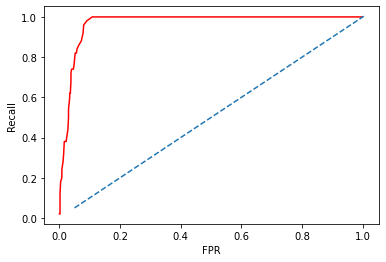

In [60]:
plt.plot(fpr, recall, c='r')
plt.plot(probility+0.05, probility+0.05, linestyle='--')
plt.xlabel('FPR');plt.ylabel('Recall')
plt.show()

可以看到，中间的虚线代表着每增加 1 个 recall，就会误伤一个多数类，因此我们更愿意看到曲线远离中间的线的情况，也就是越接近左上角越好，因此可以找到一个来衡量模型好坏的量，就是曲线下方的面积 AUC 面积。

在 sklearn 中有现成的方法

In [61]:
from sklearn.metrics import roc_curve

In [64]:
FPR, recall, thresholeds = roc_curve(y, clf_svm.decision_function(X), pos_label=1)

In [65]:
FPR

array([0.   , 0.   , 0.002, 0.002, 0.004, 0.004, 0.008, 0.008, 0.01 ,
       0.01 , 0.014, 0.014, 0.022, 0.022, 0.024, 0.024, 0.026, 0.026,
       0.03 , 0.03 , 0.034, 0.034, 0.036, 0.036, 0.038, 0.038, 0.04 ,
       0.04 , 0.048, 0.048, 0.05 , 0.05 , 0.058, 0.058, 0.064, 0.064,
       0.078, 0.078, 0.086, 0.086, 0.094, 0.094, 1.   ])

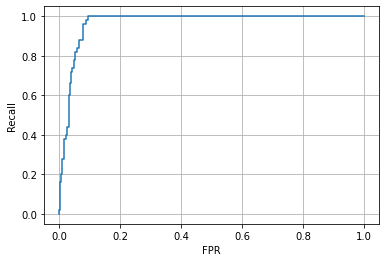

In [67]:
plt.figure()
plt.plot(FPR, recall)
plt.xlabel('FPR');plt.ylabel('Recall')
plt.grid()
plt.show()

**AUC 面积**

In [68]:
from sklearn.metrics import roc_auc_score as AUC

In [70]:
area = AUC(y, clf_svm.decision_function(X))

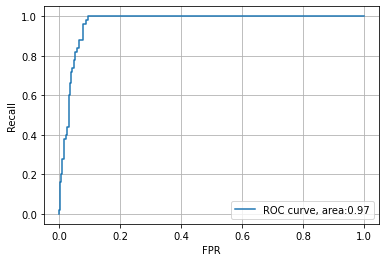

In [73]:
plt.figure()
plt.plot(FPR, recall, label='ROC curve, area:%0.2f'%area)
plt.xlabel('FPR');plt.ylabel('Recall')
plt.grid();plt.legend()
plt.show()

我们想求出 Recall 和 FPR 的最大差值，以求得最佳阈值

最大差值的索引

In [78]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
maxindex

41

最佳阈值

In [80]:
thresholeds[maxindex]

-1.138937978018466

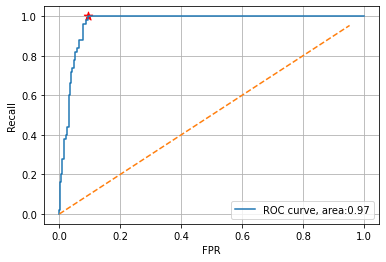

In [90]:
plt.figure()
plt.plot(FPR, recall, label='ROC curve, area:%0.2f'%area)
plt.scatter(FPR[maxindex], recall[maxindex],marker='*',c='r',s=80)
plt.plot(probility, probility, linestyle='--')
plt.xlabel('FPR');plt.ylabel('Recall')
plt.grid();plt.legend()
plt.show()

可以看到，最优阈值就是离中间虚线最远的那个点